<a href="https://colab.research.google.com/github/Rtniewi/advanced-data-ADVDS/blob/main/HW2/ADS_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//***Katrina Cwiertniewicz
//*** CSC 792
//11/13/2025
//Project 2
####The purpose of this assignment is to analyze strong associations within the data using Pearson correlation, PCA, and logistic regression using the prepared large dataset.

**Import Dependencies**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import data_table
data_table.enable_dataframe_formatter()
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA

**Loading Dataset**

In [2]:
# The Epicurious dataset includes over 6,000 recipies and 680 features

epicurious = pd.read_csv('/content/epi_r.1csv');

epicurious.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Columns of Dataset: 680**

In [3]:
epicurious.shape[1]

680

**Rows of Dataset: 20,052**

In [4]:
epicurious.shape[0]

20052

##**1a) Perform data preparation: handle missing values and duplicate recipes.**

**Duplicate Recipies are listed below**

In [5]:
# Display duplicate recipies
duplicates = epicurious.drop_duplicates(subset=['title'])
print(duplicates)

# Show duplicates using pivot table funciton from pandas dataframe documentation
duplicates_count = epicurious.pivot_table(index = ['title'], aggfunc ='size')
print(duplicates_count)

                                             title  rating  calories  protein  \
0                  Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1      Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                    Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3                 Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                        Spinach Noodle Casserole    3.125     547.0     20.0   
...                                            ...     ...       ...      ...   
20046                 Chinese Barbecued Spareribs    3.750     998.0     55.0   
20048              Artichoke and Parmesan Risotto    4.375     671.0     22.0   
20049                       Turkey Cream Puff Pie    4.375     563.0     31.0   
20050     Snapper on Angel Hair with Citrus Cream    4.375     631.0     45.0   
20051  Baked Ham with Marmalade-Horseradish Glaze    4.375     560.0     73.0   

        fat  sodium  #cakew

**Duplicates will be removed by the default method, which removes the first occurrence of each duplicate. Inplace=true will modify the current epicurious DataFrame.**

In [6]:
duplicates = epicurious.drop_duplicates(subset=['title'], inplace=True)

**Now, there are no duplicate recipies rows**

In [7]:
print(duplicates)

None


**Now the DataFrame has 2,316 less rows**

In [8]:
epicurious.shape[0]

17736

**Missing value amounts are listed below. The columns that include missing values are calories, protein, fat, and sodium.**

In [9]:
epicurious.isnull().sum()[epicurious.isnull().sum() > 0]

,0
calories,3673
protein,3698
fat,3717
sodium,3674


**The following rows require imputation to handle missing values. The missing NAN values will be substituted with the most likely values using the KNNImputer**


In [10]:
cont_att = [
    'calories',
    'protein',
    'fat',
    'sodium'
]

df = epicurious[cont_att]

imputer = KNNImputer(n_neighbors=5)

epicurious[cont_att] = imputer.fit_transform(df)

**Now, there are no NaN values.**

In [11]:
epicurious.isnull().sum()[epicurious.isnull().sum() > 0]

,0


## **1b) Adjust skewed distributions on continuous attributes.**

**The continuous attributes include rating, calories, protein, fat and sodium**

array([[<Axes: title={'center': 'sodium'}>]], dtype=object)

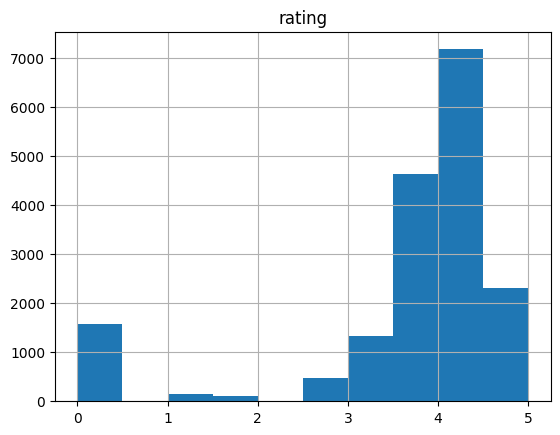

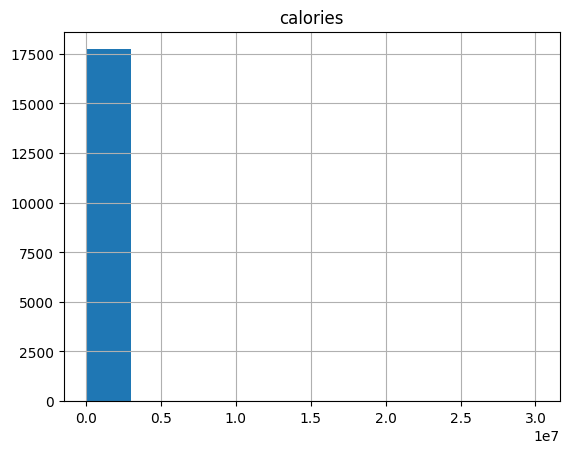

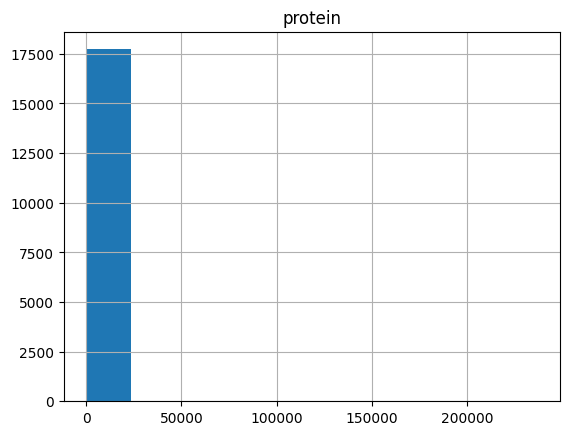

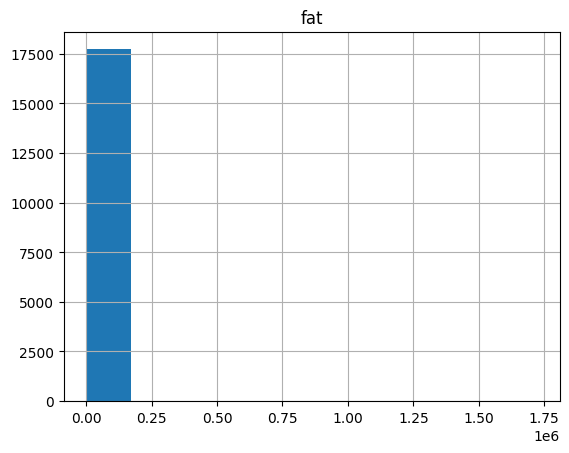

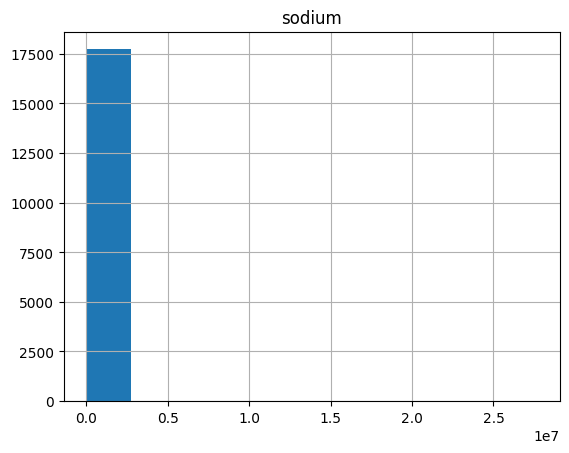

In [12]:
pd.DataFrame(epicurious['rating']).hist()
pd.DataFrame(epicurious['calories']).hist()
pd.DataFrame(epicurious['protein']).hist()
pd.DataFrame(epicurious['fat']).hist()
pd.DataFrame(epicurious['sodium']).hist()


**Rating was not heavily skewed in comparison to the other continuous attributes, so its distribution was not adjusted. Log transform is used below to redistribute the other four continuous attributes.**


In [13]:
# Calories Redistribution
epicurious['calories'] = np.log1p(epicurious['calories'])
# Protein Redistribution
epicurious['protein'] = np.log1p(epicurious['protein'])
# Fat Redistribution
epicurious['fat'] = np.log1p(epicurious['fat'])
# Sodium Redistribution
epicurious['sodium'] = np.log1p(epicurious['sodium'])

**Display a hisogram of the adjusted distribution for the continuous attributes.**

array([[<Axes: title={'center': 'sodium'}>]], dtype=object)

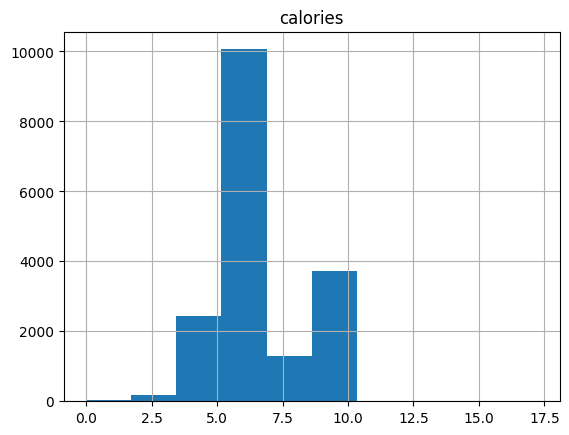

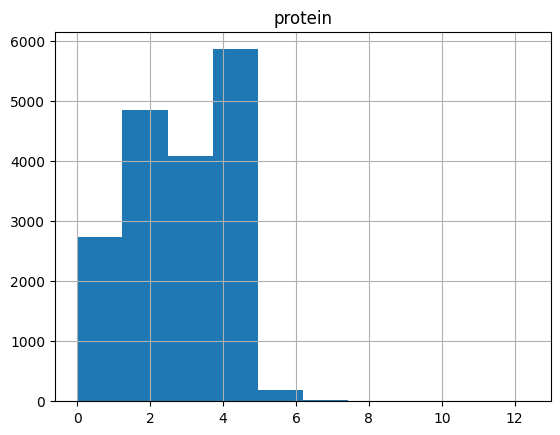

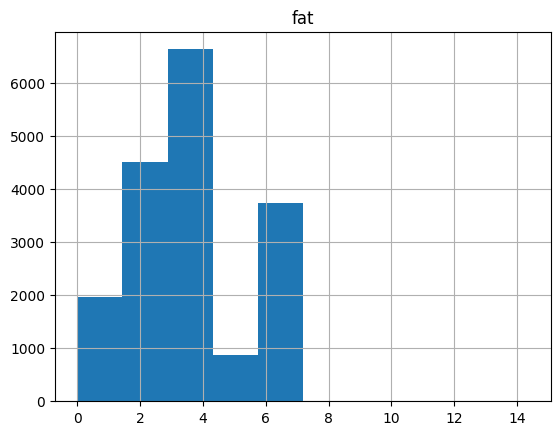

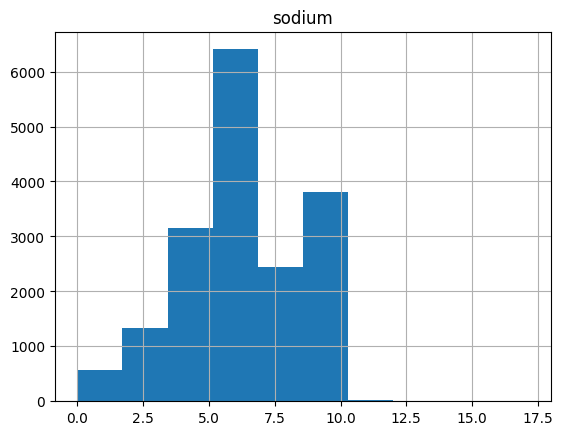

In [14]:
pd.DataFrame(epicurious['calories']).hist()
pd.DataFrame(epicurious['protein']).hist()
pd.DataFrame(epicurious['fat']).hist()
pd.DataFrame(epicurious['sodium']).hist()

**The continuous attributes are now adjusted and  distributed more evenly.**

In [20]:
# Drop title as the following step process the data with numerical attributes
epicurious_num = epicurious.drop(columns=['title'])

#StandardScale the data
scaler = StandardScaler()
scaler.fit(epicurious_num)

X = scaler.transform(epicurious_num)

scaled_data = pd.DataFrame(X, columns=epicurious_num.columns,
                          index=epicurious_num.index)

#Data is now scaled and can be processed using the Pandas DataFrame
scaled_data.head()


,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,-0.926325,-0.274944,0.413328,-0.808850,0.096278,-0.018396,-0.007509,-0.030975,-0.039047,-0.01987,...,-0.037571,-0.168383,-0.007509,-0.018396,-0.127795,-0.013007,-0.01987,-0.038316,-0.030975,6.927804
1,0.493462,-0.312555,0.068953,-0.155601,0.554616,-0.018396,-0.007509,-0.030975,-0.039047,-0.01987,...,-0.037571,-0.168383,-0.007509,-0.018396,-0.127795,-0.013007,-0.01987,-0.038316,-0.030975,-0.144346
2,0.020200,-0.916729,-0.633466,-0.808850,-0.493810,-0.018396,-0.007509,-0.030975,-0.039047,-0.01987,...,-0.037571,-0.168383,-0.007509,-0.018396,-0.127795,-0.013007,-0.01987,-0.038316,-0.030975,-0.144346
3,0.966724,1.607058,1.206350,1.478873,1.305629,-0.018396,-0.007509,-0.030975,-0.039047,-0.01987,...,-0.037571,-0.168383,-0.007509,-0.018396,-0.127795,-0.013007,-0.01987,-0.038316,-0.030975,-0.144346
4,-0.453063,-0.105469,0.139358,0.033756,-0.006625,-0.018396,-0.007509,-0.030975,-0.039047,-0.01987,...,-0.037571,-0.168383,-0.007509,-0.018396,-0.127795,-0.013007,-0.01987,-0.038316,-0.030975,-0.144346


## **2) Compute the pair-wise Pearson correlation coefficients r to see which numeric attributes have strong associations with rating.**


In [21]:
corr_matrix = scaled_data.corr()

corr_matrix["rating"].sort_values(ascending=False).head(20)

,rating
rating,1.000000
bon appétit,0.127172
peanut free,0.098944
soy free,0.095617
protein,0.093467
tree nut free,0.083627
bake,0.077350
sodium,0.074173
roast,0.073019
fat,0.072202


**The Pearson Correlation displays the numeric attributes most strongly associated with Rating. Rating is 1.00 as it is compared with itself.**

**Bon appétit is the strongest numeric attribute associated with Rating.**

**Below, displays the 20 weakest correlations; all negatives values.**

In [17]:
corr_matrix["rating"][corr_matrix["rating"] < 0.0].sort_values(ascending=False).head(105)

,rating
endive,-0.000149
calvados,-0.000154
ramadan,-0.000304
snapper,-0.000313
wok,-0.000328
...,...
custard,-0.009837
alabama,-0.009997
cookbooks,-0.009997
digestif,-0.009997


**Originally, I used -0.001, but it ended up dropping categories that were needed later, even though they were the weakest associations and were not significant to the ratings of recipes in comparison to the other numerical attributes.**


In [22]:
# Drop columns below -0.001 as these display weak associations with the data
#epicurious_num_scrubbed = epicurious_num.drop(columns=corr_matrix["rating"][corr_matrix["rating"]<-0.0005].index.tolist())
epicurious_num_scrubbed = epicurious_num

**I originally created the scaled_data for the logistic regression, but kept getting errors due to the StandardScalar creating continuous attributes. This created an error with the binary labels for model prediction.**

## **3) Perform PCA on the scrubbed data to find out which attributes contribute the most to the variance. Graph the elbow plot.**

In [23]:
pca1 = PCA()
pca1.fit(epicurious_num_scrubbed)
cumsum = np.cumsum(pca1.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

# Transform the data to its top 95% variance principal components
x_pca1 = pca1.transform(epicurious_num_scrubbed)

In [25]:
print ('Scaled data shape: ', epicurious_num_scrubbed.shape)
print ('#Components explaining 95% of variance: ', d)

Scaled data shape:  (17736, 679)
#Components explaining 95% of variance:  196


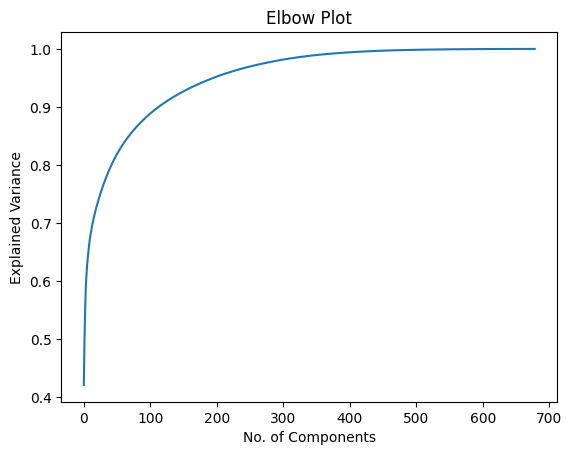

In [24]:
# The elbow plot of the explained variance
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot')
plt.show()

**By looking at the Elbow Plot, once 200 components are included, it will preserve and explain the data. This is conclusive with the PCA that 196 components will explain 95% of the data.**

## **4) Create a LogisticRegression model to determine how well the model predicts whether a recipe was part of #cakeweek or any other category that you think it should be included in the study (e.g. 22-minute meal, 3-ingredient recipe, etc.)**

In [26]:
# Split the data set and perform logistic regression
from sklearn.model_selection import train_test_split

# Epicurious scaled data
X = epicurious_num_scrubbed
# #cakeweek values
Y = epicurious_num_scrubbed['#cakeweek']

# Split the dataset (17736 instances) into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split.
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

# Perform logistic regression for the binary output 0 (not part of cakeweek) and 1 (cakeweek)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: Part of cakeweek (1) vs. not part of cakeweek (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

#Total cases (17736, 679)
#Training and testing cases (12415, 679) (5321, 679)
Confusion matrix:


,0,1
0,5320,0
1,1,0


In [27]:
epicurious_num_scrubbed[epicurious_num_scrubbed['#cakeweek'] == 1.0]

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
1629,3.125,6.040255,2.197225,2.833213,5.655992,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13785,3.750,8.529319,4.430817,4.859812,8.378850,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13842,4.375,6.889591,3.258097,4.248495,5.529429,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15563,5.000,6.218600,1.945910,3.526361,5.598422,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19273,3.750,8.882253,4.477337,6.079933,8.274867,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19492,3.750,6.520621,2.302585,3.761200,5.198497,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**From the data, #cakeweek was able to be predicted correctly except for 1 case. This case was not #cakeweek but labeled #cakeweek. Even though this confusion matrix was successful, this still doesn't prove that this logistic regression model can accurately predict if a recipe is #cakeweek or not. Although there are about 17,000 instances, #cakeweek is only represented in 6 recipes, which doesn't give the model enough cases to learn from the data.**


**To test this, a new labeled category was tested that had more available data from the dataset. Bon appétit had about a 13% correlation to Rating and should have more available data to be tested with.**

In [39]:
epicurious_num_scrubbed[epicurious_num_scrubbed['bon appétit'] == 1.0].shape

(8471, 679)

**This theory was confirmed by checking with the total recipies with the label of 'bon appétit' (8,471). This should help train the model in comparison to the #cakeweek total recipies.**

In [37]:
# Split the data set and perform logistic regression
from sklearn.model_selection import train_test_split

# Epicurious scaled data
X = epicurious_num_scrubbed
# #cakeweek values
Y = epicurious_num_scrubbed['bon appétit']

# Split the dataset (17736 instances) into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split.
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

# Perform logistic regression for the binary output 0 (not part of bon appétit) and 1 (bon appétit)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: Part of bon appétit (1) vs. not part of bon appétit (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

#Total cases (17736, 679)
#Training and testing cases (12415, 679) (5321, 679)
Confusion matrix:


,0,1
0,2778,0
1,0,2543


**This logistic regression model shows a better representation of data for both recipes that are labeled as bon appétit and not labeled as bon appétit.**

## **5) Use your own judgment on how to define a new feature healthy. Determine if healthy and rating are correlated, and if your model can predict more accurately with the new feature added to the dataset.**

**To define the new feature 'healthy', I chose buzzwords that I believe would be included with a 'healthy' recipe. These included low-calorie, low-fat descriptions as well as some food items that I consider to be 'healthy' such as tofu and vegetable.**

**Originally, I was going to categorize 'healthy' by nutritional value, but there isn't a way to determine a recipe serving, so comparing one recipe that is 3,000 calories that serves 10 people wouldn't be an accurate representation compared to a recipe that is 300 calories that serves 1 person.**

In [30]:
healthy_keywords = [
    'dairy free',
    'fat free',
    'healthy',
    'low carb',
    'low cholesterol',
    'low fat',
    'low sodium',
    'low sugar',
    'organic',
    'paleo',
    'pescatarian',
    'salad',
    'tofu',
    'vegan',
    'vegetable',
    'vegetarian',
    'yogurt'
]


**Labels the Recipie 'healthy' if it includes at least 1 keyword from the list of keywords.**

In [31]:
epicurious_num_scrubbed['healthy'] = (epicurious_num_scrubbed[healthy_keywords].sum(axis=1) > 0).astype(int)

In [32]:
corr_matrix = scaled_data.corr()

In [33]:
print(corr_matrix["rating"]["healthy"])

0.02041423457809999


**For this correlation matrix, healthy has a very small correlation to rating(2%). When comparing this to the original correlation matrix, it's not a major difference with bon appetit as the highest at 12 percent.**

**I believe if the correct keywords were chosen, we would see a better correlation to rating. For healthy, I think the correlation could be higher, but we may not see a major difference, considering a healthy recipe doesn't automatically mean a better rating.**

In [35]:
# Scaled data
X = epicurious_num_scrubbed
# #cakeweek values
Y = epicurious_num_scrubbed['#cakeweek']

# Split the dataset (17736 instances) into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split.
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

# Perform logistic regression for the binary output 0 (not part of thanksgiving) and 1 (thanksgiving)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: Part of thanksgiving (1) vs. not part of thanksgiving (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

#Total cases (17736, 679)
#Training and testing cases (12415, 679) (5321, 679)
Confusion matrix:


,0,1
0,5320,0
1,1,0


**The model does not seem to predict more accurately with the new feature. However, this could still be due to a lack of examples to check for certain keywords such as #cakeweek.**

## **Closing Remarks**

**When assessing the entire dataset, certain keywords do correlate with rating. However, these are very minimal, and a combination of specific ones may show a clearer trend with the data. Only 200 components are required to describe over 95% of the variance, meaning many components are insignificant to the overall dataset. This would make sense, as components such as specific food items would only show up in so many recipes that wouldn't necessarily relate to a trend with the data.**

**A clearer trend might be more noticeable if dietary restrictions are assessed, such as vegetarian dishes only having vegetables. In comparison, a feature such as 'healthy' would be difficult to find correlations for because of the ambiguity of the term healthy.**